core           INFO 	Loading data for British Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['44', '1', '4', '81', '55', '27', '18', '14', '23', '22', '2', '20', '3', '16', '77', '31', '11', '24', '63', '10']


Lewis Hamilton's race data for Silverstone 2024:
   DriverNumber BroadcastName Abbreviation  DriverId  TeamName TeamColor  \
44           44    L HAMILTON          HAM  hamilton  Mercedes    27F4D2   

      TeamId FirstName  LastName        FullName  ... CountryCode Position  \
44  mercedes     Lewis  Hamilton  Lewis Hamilton  ...         GBR      1.0   

    ClassifiedPosition GridPosition  Q1  Q2  Q3                   Time  \
44                   1          2.0 NaT NaT NaT 0 days 01:22:27.059000   

      Status Points  
44  Finished   25.0  

[1 rows x 21 columns]


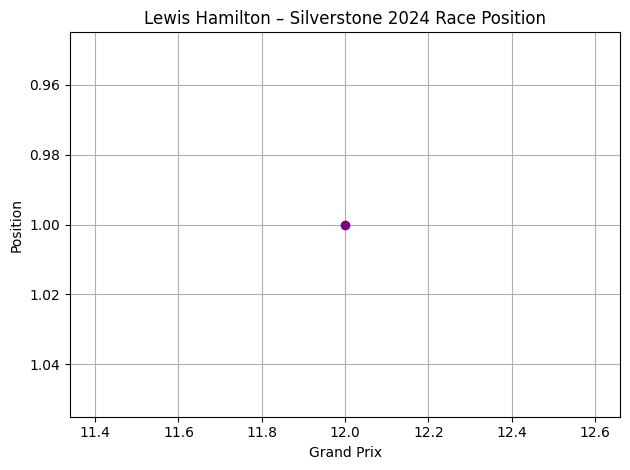

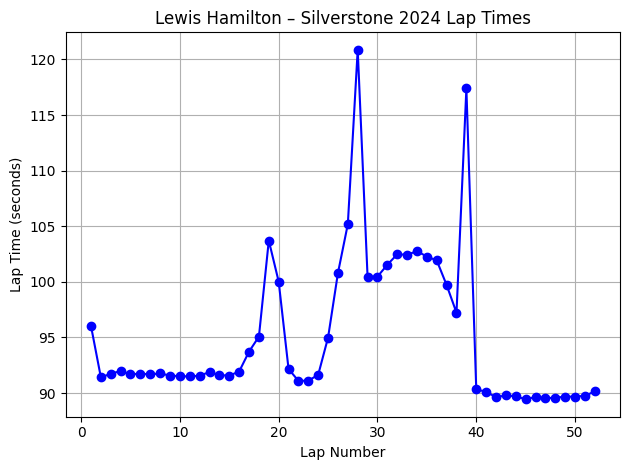

Final Position: 1.0
Points Earned: 25.0


In [3]:
# 🏁 Lewis Hamilton – Silverstone 2024 Race Performance

import fastf1
import matplotlib.pyplot as plt
import pandas as pd

# Enable cache for faster loading of data
fastf1.Cache.enable_cache('cache')

# Load Silverstone 2024 Race Session
season = 2024
round_number = 12  # Silverstone is round 12 of the 2024 season

# Get the Silverstone session data
session = fastf1.get_session(season, round_number, 'R')
session.load()

# Filter for Lewis Hamilton (using his driver abbreviation 'HAM')
hamilton = session.results.loc[session.results['Abbreviation'] == 'HAM']

# Check if Hamilton's data is available
if not hamilton.empty:
    print("Lewis Hamilton's race data for Silverstone 2024:")
    print(hamilton)
else:
    print("No data found for Lewis Hamilton in this session.")

# -------------------------------------------
# Visualize Hamilton's performance: Finishing position
plt.plot([round_number], [int(hamilton['Position'].values[0])], marker='o', color='purple')
plt.gca().invert_yaxis()  # Invert y-axis to show 1st place at the top
plt.title("Lewis Hamilton – Silverstone 2024 Race Position")
plt.ylabel("Position")
plt.xlabel("Grand Prix")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# Analyze his lap times (optional, visualizing lap-by-lap)
laps = session.laps

# Filter Hamilton's laps
hamilton_laps = laps[laps['Driver'] == 'HAM']

# Plot lap times over the race
plt.plot(hamilton_laps['LapNumber'], hamilton_laps['LapTime'].dt.total_seconds(), marker='o', color='blue')
plt.title("Lewis Hamilton – Silverstone 2024 Lap Times")
plt.xlabel("Lap Number")
plt.ylabel("Lap Time (seconds)")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------
# Show summary for Hamilton’s performance in the race
print(f"Final Position: {hamilton['Position'].values[0]}")
print(f"Points Earned: {hamilton['Points'].values[0]}")
